In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy import stats
import gower
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
import random
import umap as umap


def load_data(filepath):
    '''takes in the file path where the data is store and returns a pandas dataframe.
    filepath must be entered as a string
    '''
    
    df = pd.read_csv(filepath)
    return df;

filepath = '../data/portfolio3_ETL.csv'
portfolio3_ID = load_data(filepath)

portfolio3 = portfolio3_ID.drop(columns=['id'])
portfolio3.head()

,idade_empresa_anos,"de_faixa_faturamento_estimado_ATE R$ 81.000,00","de_faixa_faturamento_estimado_DE R$ 1.500.000,01 A R$ 4.800.000,00","de_faixa_faturamento_estimado_DE R$ 10.000.000,01 A R$ 30.000.000,00","de_faixa_faturamento_estimado_DE R$ 100.000.000,01 A R$ 300.000.000,00","de_faixa_faturamento_estimado_DE R$ 30.000.000,01 A R$ 100.000.000,00","de_faixa_faturamento_estimado_DE R$ 300.000.000,01 A R$ 500.000.000,00","de_faixa_faturamento_estimado_DE R$ 360.000,01 A R$ 1.500.000,00","de_faixa_faturamento_estimado_DE R$ 4.800.000,01 A R$ 10.000.000,00","de_faixa_faturamento_estimado_DE R$ 500.000.000,01 A 1 BILHAO DE REAIS",...,setor_INDUSTRIA,setor_SERVIÇO,setor_nan,sg_uf_AM,sg_uf_MA,sg_uf_PI,sg_uf_RN,sg_uf_RO,vl_total_veiculos_leves_grupo,vl_total_veiculos_pesados_grupo
0,21.81,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,1
1,16.39,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
2,40.38,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,43.85,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,1
4,43.87,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [2]:
#list of non bolean columns taken from the market database
non_bolean_cols = ['idade_empresa_anos',
 'idade_maxima_socios',
 'idade_media_socios',
 'idade_minima_socios',
 'qt_filiais',
 'qt_socios',
 'qt_socios_st_regular']

In [3]:
def min_max_col(df_transform,cols):
    '''
    Input 
    Takes in a dataframe and a column being a continuous feature to normalize (min =0, and max =1)
    
    Output
    New dataframe with the column passed normalized
    '''
    mmsc = MinMaxScaler()
    for col in cols:
        var_cont = df_transform.loc[:,col].values.reshape(-1,1)
        var_cont_standarized = mmsc.fit_transform(var_cont)
        df_transform.loc[:,col] = var_cont_standarized
    return df_transform;



#Keeping the same rule applied to the market, which is normalization over standarization in iteration 0
portfolio3 = min_max_col(portfolio3,non_bolean_cols)
portfolio3[non_bolean_cols]

,idade_empresa_anos,idade_maxima_socios,idade_media_socios,idade_minima_socios,qt_filiais,qt_socios,qt_socios_st_regular
0,0.412341,0.453488,0.441860,0.418605,0.011628,0.000000,0.000000
1,0.306170,0.767442,0.767442,0.767442,0.000000,0.007246,0.000000
2,0.776102,0.453488,0.441860,0.418605,0.000000,0.000000,0.000000
3,0.844074,0.453488,0.441860,0.418605,0.000000,0.000000,0.000000
4,0.844466,0.453488,0.441860,0.418605,0.005814,0.000000,0.000000
...,...,...,...,...,...,...,...
260,0.356905,0.558140,0.558140,0.558140,0.000000,0.007246,0.000000
261,0.425661,0.546512,0.372093,0.267442,0.017442,0.021739,0.018519
262,0.234868,0.523256,0.430233,0.337209,0.000000,0.007246,0.009259
263,0.502253,0.767442,0.639535,0.476744,0.029070,0.021739,0.027778


In [4]:
dissimilarity_matrix = gower.gower_matrix(portfolio3)
dissimilarity_matrix.shape, dissimilarity_matrix

((265, 265),
 array([[0.        , 0.05949069, 0.07867876, ..., 0.07275528, 0.06309787,
         0.06945597],
        [0.05949069, 0.        , 0.09097382, ..., 0.08289523, 0.06874134,
         0.08725666],
        [0.07867876, 0.09097382, 0.        , ..., 0.02188547, 0.04660119,
         0.07754648],
        ...,
        [0.07275528, 0.08289523, 0.02188547, ..., 0.        , 0.06424994,
         0.06783611],
        [0.06309787, 0.06874134, 0.04660119, ..., 0.06424994, 0.        ,
         0.09141041],
        [0.06945597, 0.08725666, 0.07754648, ..., 0.06783611, 0.09141041,
         0.        ]], dtype=float32))

In [5]:
# set random initial medoids
initial_medoids = [1, 10, 50, 100]
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(dissimilarity_matrix, initial_medoids, data_type='distance_matrix')
# run cluster analysis and obtain results
kmedoids_instance.process()

clusters = kmedoids_instance.get_clusters()

medoids = kmedoids_instance.get_medoids()

medoids

[66, 224, 16, 160]

In [6]:
kmedoids_instance.get_cluster_encoding()

<type_encoding.CLUSTER_INDEX_LIST_SEPARATION: 1>

In [7]:
len(clusters[0]), len(clusters[1]), len(clusters[2]), len(clusters[3])

(33, 43, 53, 136)

In [8]:
labels = pd.Series(0,index=range(0,portfolio3.shape[0]))
for i in range (0,len(clusters)):
    for n in range (0,len(clusters[i])):
        index = clusters[i][n]
        labels.iloc[index] = i

labels.value_counts()

3    136
2     53
1     43
0     33
dtype: int64

In [9]:
silhouette_score(dissimilarity_matrix, labels, metric='precomputed', sample_size=None, random_state=42)

0.23027454

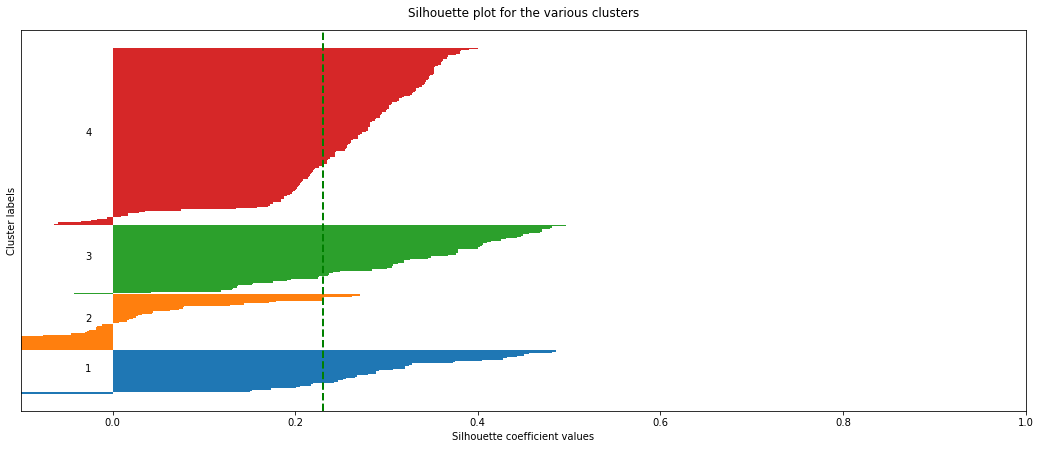

In [10]:
X = dissimilarity_matrix

# Get silhouette samples
silhouette_vals = silhouette_samples(X, labels,metric='precomputed')
# Silhouette plot
fig, (ax1) = plt.subplots(1)
fig.set_size_inches(18, 7)
    
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
    ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
    y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
avg_score = np.mean(silhouette_vals)
ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
ax1.set_yticks([])
ax1.set_xlim([-0.1, 1])
ax1.set_xlabel('Silhouette coefficient values')
ax1.set_ylabel('Cluster labels')
ax1.set_title('Silhouette plot for the various clusters', y=1.02);

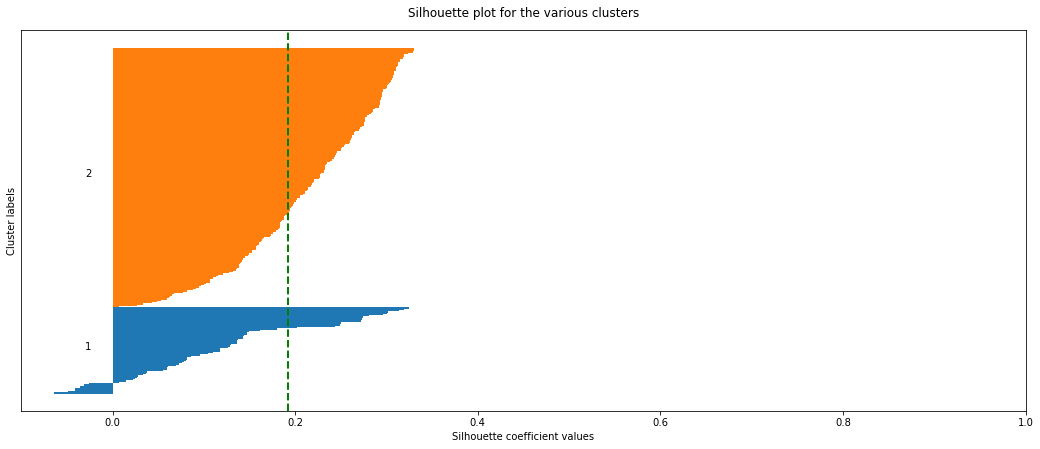

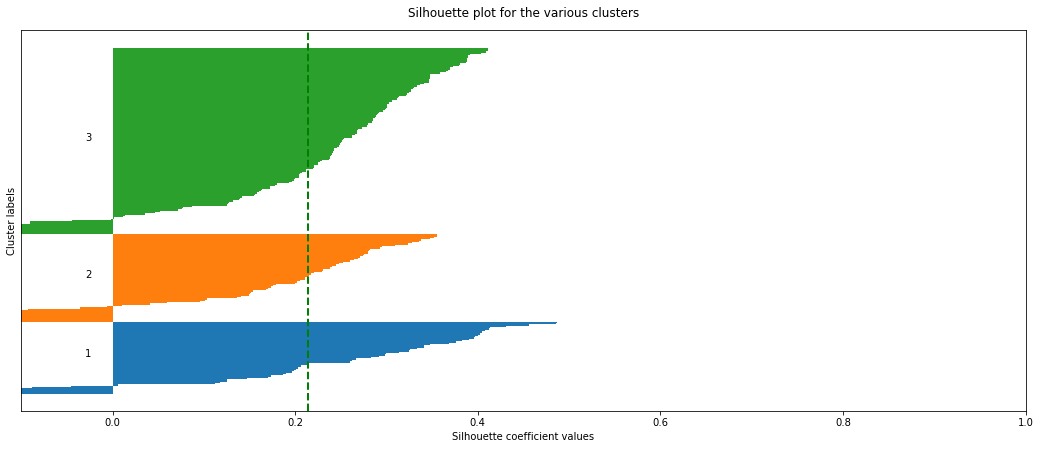

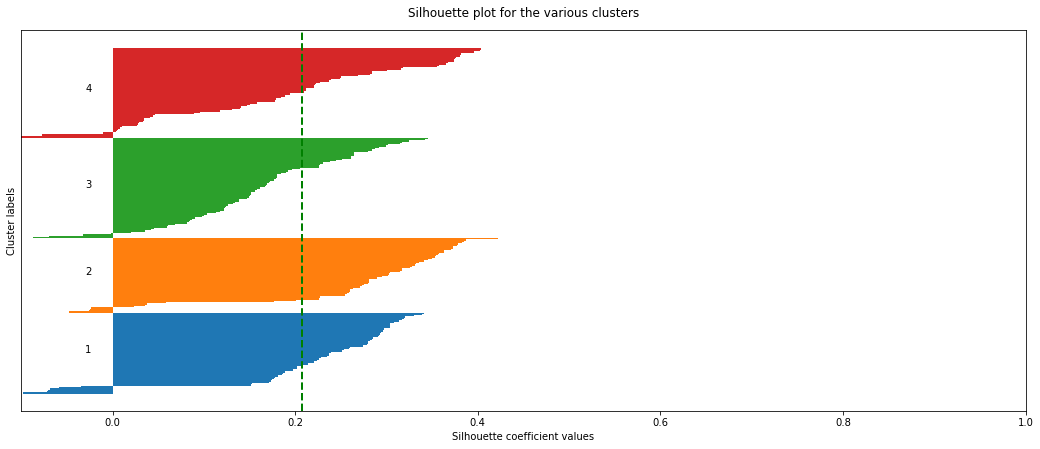

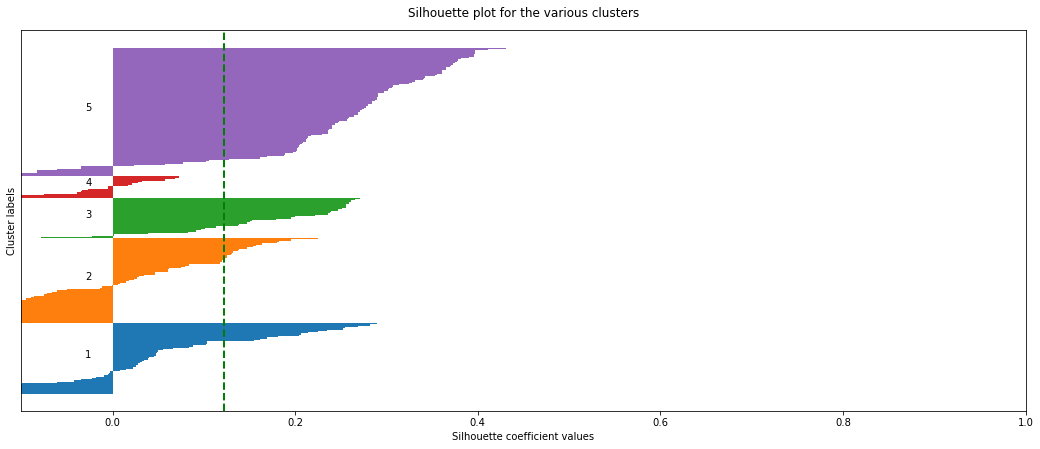

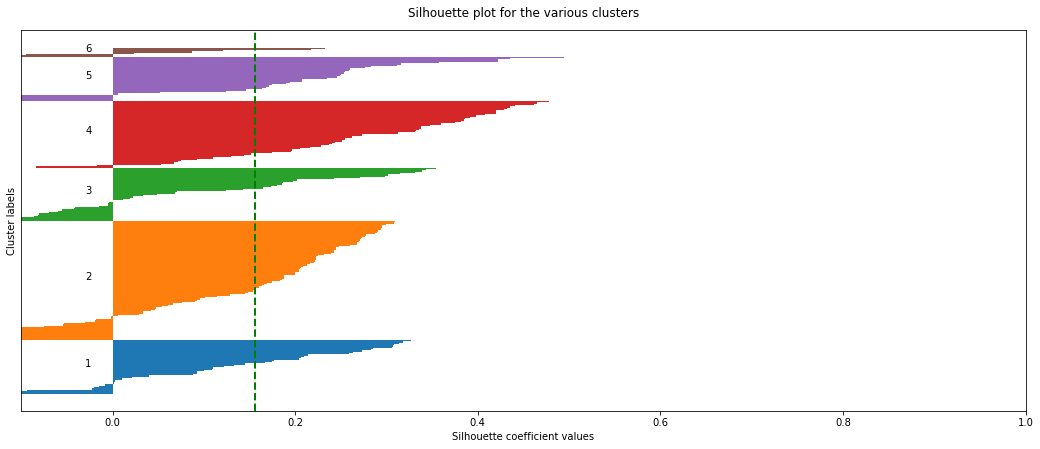

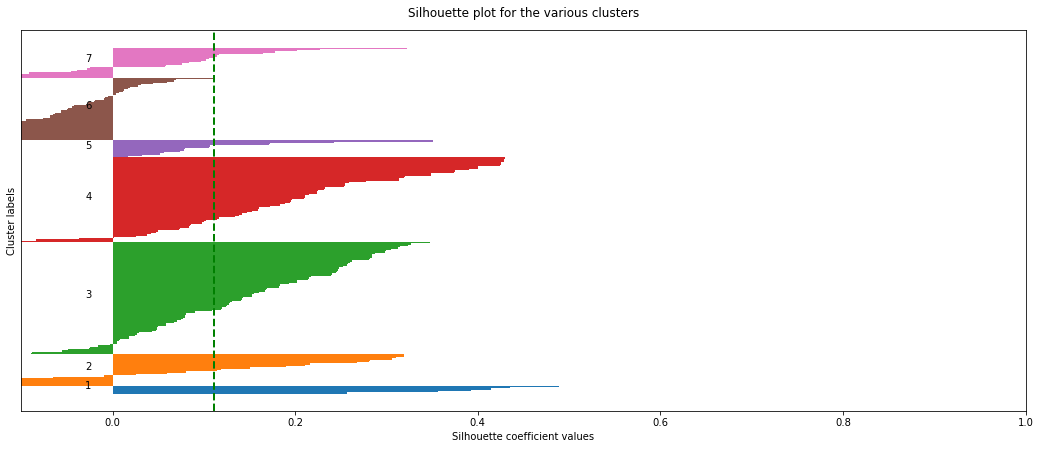

In [62]:
k_scores = []
wss = []
random.seed(42)
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
    
    medoids_km = random.sample(range(1, 266), k)
    # Run the Kmeans algorithm
    km = kmedoids(dissimilarity_matrix, medoids_km, data_type='distance_matrix')
    km.process()
    #centroids = kmedoids_instance.get_medoids()
    clusters_km = km.get_clusters()
    labels_km = pd.Series(0,index=range(0,portfolio3.shape[0]))
    for i in range (0,len(clusters_km)):
        for n in range (0,len(clusters_km[i])):
            index = clusters_km[i][n]
            labels_km.iloc[index] = i
    
    clusters_distances = []
    for n in range (0,len(clusters_km)):
        clusters_distances.append(X[medoids_km[n]][labels_km[labels_km == n].index].sum())
    
    wss.append(sum(clusters_distances))

    # Get silhouette samples
    silhouette_vals = silhouette_samples(X, labels_km,metric='precomputed')

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels_km)):
        cluster_silhouette_vals = silhouette_vals[labels_km == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    
    avg_score = np.mean(silhouette_vals)
    k_scores.append(avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
   

In [63]:
k_scores

[0.19260731, 0.21457124, 0.20716766, 0.12193871, 0.15591316, 0.11121259]

In [64]:
wss

[12.413126468658447,
 10.890002369880676,
 10.685639381408691,
 11.172444999217987,
 11.264021083712578,
 9.15341991186142]

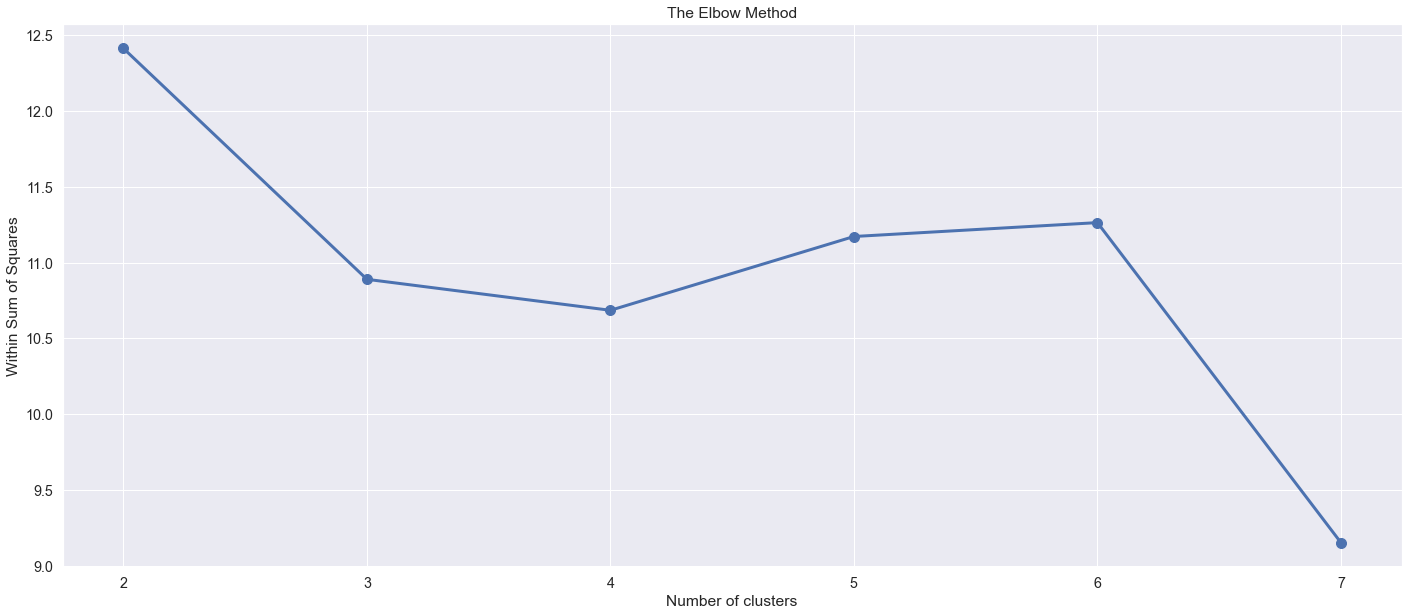

In [95]:
sns.set(font_scale = 1.3)

plt.figure(figsize=(24,10))
plt.plot(list(range(2, 8)), wss,marker='o', linewidth=3, markersize=10)

plt.title('The Elbow Method') 
plt.xlabel("Number of clusters")
plt.ylabel("Within Sum of Squares")

plt.show()

In [40]:
dissimilarity_matrix[143][labels_km[labels_km == 0].index].sum(), dissimilarity_matrix[4][labels_km[labels_km == 1].index].sum()

(0.12245959, 0.9294964)

In [30]:
dissimilarity_matrix[82][labels[labels_km == 2].index].sum(), dissimilarity_matrix[217][labels[labels_km == 3].index].sum()

(2.7010312, 2.005041)

In [32]:
dissimilarity_matrix[175][labels[labels_km == 4].index].sum(), dissimilarity_matrix[80][labels[labels_km == 5].index].sum()

(0.5041714, 2.0761116)

In [33]:
dissimilarity_matrix[111][labels[labels_km == 6].index].sum()

0.8151089

In [35]:
medoids

[66, 224, 16, 160]

In [37]:
dissimilarity_matrix[66][labels[labels == 0].index].sum(), dissimilarity_matrix[224][labels[labels == 1].index].sum(),dissimilarity_matrix[16][labels[labels == 2].index].sum(),dissimilarity_matrix[160][labels[labels == 3].index].sum()

(0.90138096, 1.51566, 1.5093358, 4.142185)

In [38]:
0.9+1.51+1.51+4.14

8.059999999999999

In [39]:
0.12+0.93+2.7+2+0.5+2.08+0.815

9.145

In [ ]:
random_state = 42

reducer = umap.UMAP()
embedding = reducer.fit_transform(portfolio3)
embedding.shape

In [ ]:
def draw_umap(data, n_neighbors, min_dist, n_components, title, metric='euclidean'):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure(figsize=(24,10))
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)))
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], s=100)
    plt.title(title, fontsize=18)
    
title = 'UMAP projection of portfolio3'    
draw_umap(portfolio3,14,0.1,3,title)

In [ ]:
X = fit.fit_transform(portfolio3)
number_clusters = 4
kmeans = KMeans(n_clusters = number_clusters, init = 'k-means++', random_state = random_state)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], z=X[y_kmeans == 0, 2], name='Cluster 1', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], z=X[y_kmeans == 1, 2], name='Cluster 2', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], z=X[y_kmeans == 2, 2], name='Cluster 3', mode='markers'))
fig.add_trace(go.Scatter3d(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], z=X[y_kmeans == 3, 2], name='Cluster 4', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], name='Cluster 5', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], name='Cluster 6', mode='markers'))
#fig.add_trace(go.Scatter(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], name='Cluster 7', mode='markers'))#comment the lines if you chose less clusters
#add more lines if you chose more clusters

fig.add_trace(go.Scatter3d(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],z=kmeans.cluster_centers_[:, 2], name='Centroids', 
                         mode='markers', marker_color="rgb(255,255,0)", marker=dict(size=16)))

fig.update_layout(title='Clusters')

fig.show()